In [25]:
from PIL import Image, ImageFont, ImageDraw, ImageColor
#from IPython import display
#import cv2
import json

In [2]:
ImageColor.colormap

{'aliceblue': '#f0f8ff',
 'antiquewhite': '#faebd7',
 'aqua': '#00ffff',
 'aquamarine': '#7fffd4',
 'azure': '#f0ffff',
 'beige': '#f5f5dc',
 'bisque': '#ffe4c4',
 'black': '#000000',
 'blanchedalmond': '#ffebcd',
 'blue': '#0000ff',
 'blueviolet': '#8a2be2',
 'brown': '#a52a2a',
 'burlywood': '#deb887',
 'cadetblue': '#5f9ea0',
 'chartreuse': '#7fff00',
 'chocolate': '#d2691e',
 'coral': '#ff7f50',
 'cornflowerblue': '#6495ed',
 'cornsilk': '#fff8dc',
 'crimson': '#dc143c',
 'cyan': '#00ffff',
 'darkblue': '#00008b',
 'darkcyan': '#008b8b',
 'darkgoldenrod': '#b8860b',
 'darkgray': '#a9a9a9',
 'darkgrey': '#a9a9a9',
 'darkgreen': '#006400',
 'darkkhaki': '#bdb76b',
 'darkmagenta': '#8b008b',
 'darkolivegreen': '#556b2f',
 'darkorange': '#ff8c00',
 'darkorchid': '#9932cc',
 'darkred': '#8b0000',
 'darksalmon': '#e9967a',
 'darkseagreen': '#8fbc8f',
 'darkslateblue': '#483d8b',
 'darkslategray': '#2f4f4f',
 'darkslategrey': '#2f4f4f',
 'darkturquoise': '#00ced1',
 'darkviolet': '#9400d3

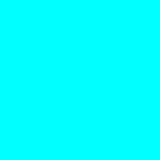

In [87]:
image_PIL = Image.new("RGB",
                  [160, 160],
                  #color=128,
                  color=ImageColor.colormap["aqua"],
                  #color=ImageColor.colormap["white"],
)
image_PIL

In [88]:
help(Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



In [89]:
image_PIL.mode

'RGB'

In [90]:
draw = ImageDraw.Draw(image_PIL)
draw

In [91]:
help(ImageFont.truetype)

Help on function truetype in module PIL.ImageFont:

truetype(font=None, size=10, index=0, encoding='', layout_engine=None)
    Load a TrueType or OpenType font from a file or file-like object,
    and create a font object.
    This function loads a font object from the given file or file-like
    object, and creates a font object for a font of the given size.
    
    Pillow uses FreeType to open font files. If you are opening many fonts
    simultaneously on Windows, be aware that Windows limits the number of files
    that can be open in C at once to 512. If you approach that limit, an
    ``OSError`` may be thrown, reporting that FreeType "cannot open resource".
    
    This function requires the _imagingft service.
    
    :param font: A filename or file-like object containing a TrueType font.
                 If the file is not found in this filename, the loader may also
                 search in other directories, such as the :file:`fonts/`
                 directory on Window

In [92]:
ImageFont.LAYOUT_BASIC

0

In [93]:
help(draw.point)

Help on method point in module PIL.ImageDraw:

point(xy, fill=None) method of PIL.ImageDraw.ImageDraw instance
    Draw one or more individual pixels.



**N.B.** Note that according to your computer, you will have to specify your own path to a font which is able to display Japanese (or any other language you'd like to play with).

In [106]:
string = "母音は5種類しかないなど、"
font = ImageFont.truetype(
    "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf", 16)
#font = ImageFont.truetype(
#    "/usr/share/fonts/truetype/hanazono/HanaMinA.ttf", 16)
x, y = 10, 30
start_coord = (x, y)
w = 3
h = 3
end_coord = (x+w, y+h)


## Drawing a point (i.e. one pixel) is too small for us to see
#draw.point(start_coord)
draw.rectangle([start_coord, end_coord], fill=(120,0,0))
draw.text(start_coord, string, font=font)

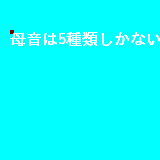

In [107]:
image_PIL

In [108]:
help(draw.text)

Help on method text in module PIL.ImageDraw:

text(xy, text, fill=None, font=None, anchor=None, spacing=4, align='left', direction=None, features=None, language=None, stroke_width=0, stroke_fill=None, embedded_color=False, *args, **kwargs) method of PIL.ImageDraw.ImageDraw instance



## Useful args for `draw.text()`

- `fill` to specify color
- `anchor` to specify relative position (cf. <https://pillow.readthedocs.io/en/stable/handbook/text-anchors.html#text-anchors>)
- `spacing`
- `stroke_width`

## Not Considering Using `cv2`
This is because

- `cv2` draws on an ndarray
- `PIL` draws on its own `Image` object

and it is extremely inconvenient to convert btw them and draw like this. Besides, `PIL` has its own drawing module; it would be stupid to not stay in `PIL` and complete all the drawings.

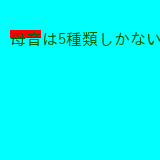

In [109]:
image_PIL = Image.new("RGB",
                  [160, 160],
                  color=ImageColor.colormap["aqua"],
)
draw = ImageDraw.Draw(image_PIL)
string = "母音は5種類しかないなど、"
font = ImageFont.truetype(
    "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf", 16)
# coordinate in (x,y) form
x, y = 10, 30
start_coord = (x, y)
w = 30
h = 7
end_coord = (x+w, y+h)
draw.rectangle([start_coord, end_coord], fill=(255,0,0,100), width=2)
draw.text(start_coord,
          string,
          font=font,
          #fill=ImageColor.colormap["green"],
          fill=(0,100,0),
)
image_PIL

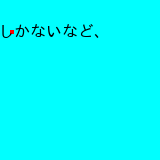

In [110]:
image_PIL = Image.new("RGB",
                  [160, 160],
                  color=ImageColor.colormap["aqua"],
)
draw = ImageDraw.Draw(image_PIL)
string = "母音は5種類しかないなど、"
font = ImageFont.truetype(
    "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf", 16)
# coordinate in (x,y) form
x, y = 10, 30
start_coord = (x, y)
w = 3
h = 3
end_coord = (x+w, y+h)
draw.rectangle([start_coord, end_coord],
               fill=(255,0,0),
               width=2,
)
draw.text(start_coord,
          string,
          font=font,
          #anchor="lb",
          anchor="mm",
          #fill=ImageColor.colormap["green"],
          fill=(0,0,0),
)
image_PIL

## Applications
- Many OCR programs return the coordinates of the bounding boxes and the texts detected in json format. **To visually compare the OCR results to the truth**, we can use the drawing technique we just learned.

### OCR
- `tokyo.jpg` is the original image I found arbitrarily on the Internet
- `tokyo.json` stores its OCR results

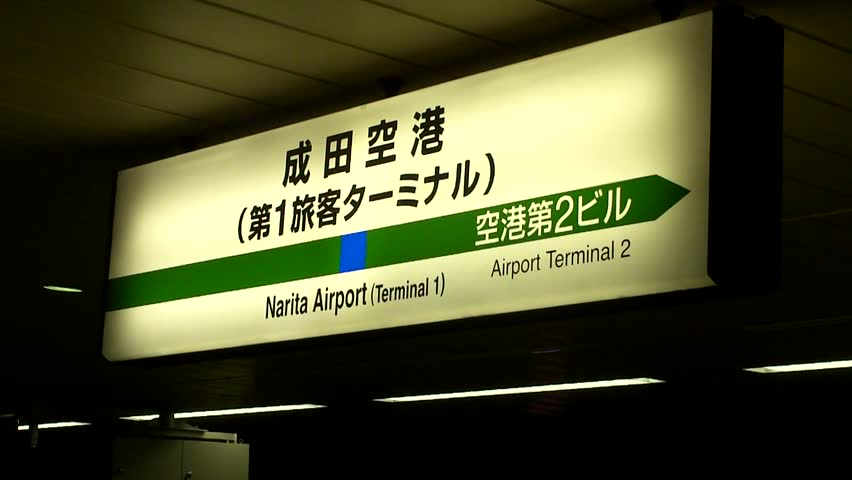

In [77]:
image_PIL = Image.open("tokyo.jpg")
image_PIL

In [68]:
with open("tokyo.json", "r") as f:
    D_json = json.load(f)
D_json

{'meta': {'imageSize': {'width': 852, 'height': 480},
  'domain': 'general',
  'language': 'ja'},
 'words': [{'id': 1,
   'boundingBox': [[267, 139], [446, 96], [460, 155], [281, 198]],
   'isVertical': False,
   'text': '成田空港',
   'confidence': 1},
  {'id': 2,
   'boundingBox': [[223, 204], [499, 147], [509, 196], [233, 252]],
   'isVertical': False,
   'text': '(第1旅客ターミナル)',
   'confidence': 0.999},
  {'id': 3,
   'boundingBox': [[465, 208], [633, 177], [641, 224], [473, 254]],
   'isVertical': False,
   'text': '空港第2ビル',
   'confidence': 0.9998},
  {'id': 4,
   'boundingBox': [[260, 293], [310, 288], [312, 314], [262, 319]],
   'isVertical': False,
   'text': 'Narita',
   'confidence': 0.9999},
  {'id': 5,
   'boundingBox': [[307, 286], [370, 280], [373, 310], [310, 316]],
   'isVertical': False,
   'text': 'Airport',
   'confidence': 0.9991},
  {'id': 6,
   'boundingBox': [[366, 280], [448, 271], [450, 295], [368, 304]],
   'isVertical': False,
   'text': '(Terminal1)',
   'confide

In [62]:
D_json.keys()

dict_keys(['meta', 'words', 'lines'])

In [63]:
type(D_json["words"]), len(D_json["words"])

(list, 8)

In [64]:
D_json["words"][0]["boundingBox"]

[[267, 139], [446, 96], [460, 155], [281, 198]]

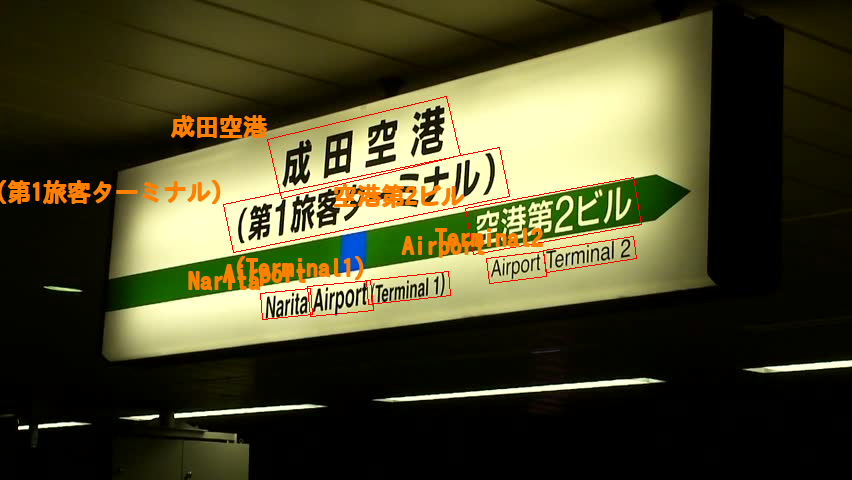

In [114]:
image_PIL = Image.open("tokyo.jpg")

draw = ImageDraw.Draw(image_PIL)
font = ImageFont.truetype(
    "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf", 24)

red = (255,0,0)
blue = (0,0,255)
green = (0,120,0)
orange = (255,128,0,255)
for D_detected in D_json["words"]:
    xys = [tuple(xy) for xy in D_detected["boundingBox"]]
    draw.polygon(xys,
                 #fill=red,
                 outline=red,
    )
    draw.text(D_detected["boundingBox"][0],
              D_detected["text"],
              anchor="rd",
              font=font,
              fill=orange,
              stroke_width=1,
    )
image_PIL

## Ref
- Pillow
  - <https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html>
  - <https://pillow.readthedocs.io/en/stable/handbook/text-anchors.html#text-anchors>
- Japanese font in Linux
  - <https://wiki.archlinux.org/title/Localization/Japanese>
  - <https://www.reddit.com/r/LearnJapanese/comments/5f00xg/linux_good_japanese_font_input_method/>
- Stackoverflow, GitHub discussions
  - <https://stackoverflow.com/questions/50854235/how-to-draw-chinese-text-on-the-image-using-cv2-puttextcorrectly-pythonopen>
  - <https://stackoverflow.com/questions/11411746/drawing-multilingual-text-using-pil>
  - <https://stackoverflow.com/questions/15519373/opencv-puttext-utf-8-characters>
  - <https://github.com/python-pillow/Pillow/issues/2656>